# Библиотеки

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Функции

In [ ]:
def f1(x):
    return -5 * pow(x, 5) + 4 * pow(x, 4) - 12 * pow(x, 3) + 11 * pow(x, 2) - 2 * x + 1
def f2(x):
    return pow(math.log10(x - 2), 2) + pow(math.log10(10 - x), 2) - pow(x, 0.2)
def f3(x):
    return -3 * x * math.sin(0.75*x) + math.exp(-2*x)
def f4(x):
    return math.exp(3 * x) + 5 * math.exp(-2 * x)
def f5(x):
    return 0.2 * x * math.log10(x) + pow(x - 2.3, 2)
def fmod(x):
    return math.pow(math.sin(math.pi*x), 2) * - math.log10(x)
def fmod2(x):
    return math.sin(x) * pow(x, 2) + math.log(x)
def fmod3(x):
    return abs(pow(x, 3)) * math.tan(x)


#Таблицы

In [ ]:
t1 = pd.DataFrame(columns=['left', 'right', 'x1', 'x2', 'f(left)', 'f(right)', 
                                'f(x1)', 'f(x2)', 'ratio'])
t2 =  pd.DataFrame(columns=['left', 'right', 'x1', 'x2', 'f(left)', 'f(right)', 
                                'f(x1)', 'f(x2)', 'ratio'])
t3 = pd.DataFrame(columns=['left', 'right', 'x1', 'x2', 'f(left)', 'f(right)', 
                                'f(x1)', 'f(x2)', 'ratio'])
t4 = pd.DataFrame(columns=['x1', 'x2', 'x3', 'f(x1)', 'f(x2)', 'f(x3)', 'u',
                                'f(u)', 'ratio'])
t5 = pd.DataFrame(columns=['a', 'b', 'x', 'u', 'w', 'v', 'f(x)', 'f(u)',
                                'f(w)', 'f(v)', 'ratio'])
comparison = pd.DataFrame(columns=['f1', 'f2', 'f3', 'f4', 'f5'], index=[
     'current min',
     'counted m1',
     'counted m2', 
     'counted m3', 
     'counted m4', 
     'counted m5'] )
total_iterations = pd.DataFrame(columns=['f1', 'f2', 'f3', 'f4', 'f5'], index=[
      'method 1',
      'method 2',
      'method 3',
      'method 4',
      'method 5'])                                                                               


#Заполнение таблиц

In [ ]:
def fill_t(matrix: pd.DataFrame, func, left, right, x1, x2, y1, y2):
    if matrix.shape[0] == 0:
        matrix.loc[matrix.shape[0]] = [left, right, x1, x2, func(left), func(right), y1, y2, 1.0]
    else:
        dist = matrix.loc[0, 'right'] - matrix.loc[0, 'left']
        matrix.loc[matrix.shape[0]] = [left, right, x1, x2, func(left), func(right), y1, y2, (right - left) / dist]

#Отрисовка графика

In [ ]:
def plot_function(f, left, right):
    d = 0.01
    X = np.arange(left, right, d)
    Y = [f(x) for x in X]
    fig, ax = plt.subplots()
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.plot(X, Y)

#Графики функций

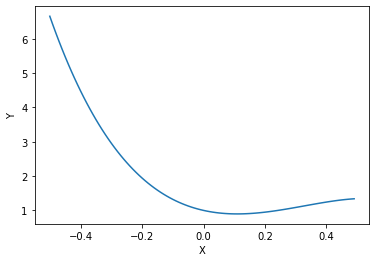

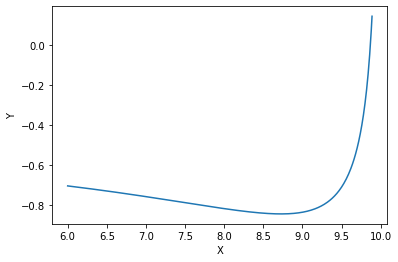

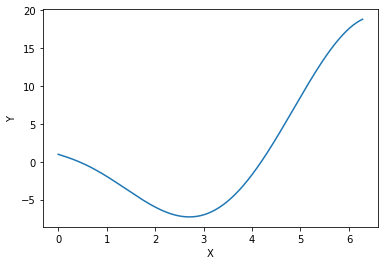

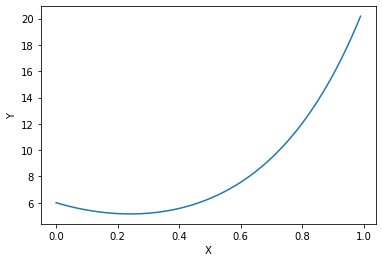

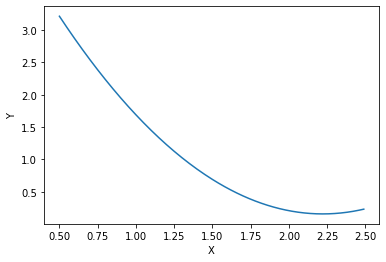

In [ ]:
# list of function's minimums 
f1_min = 0.897633
f2_min = -0.846037
f3_min = -7.27436
f4_min = 5.1483
f5_min = 0.160177

comparison.loc['current min'] = [f1_min, f2_min, f3_min, f4_min, f5_min]

plot_function(f1, -0.5, 0.5)
plot_function(f2, 6, 9.9)
plot_function(f3, 0, 2*math.pi)
plot_function(f4, 0, 1)
plot_function(f5, 0.5, 2.5)


# Метод дихотомии

In [ ]:
e = 0.001
k = 0
def method1(f, left, right, delta, e, flag=False):
    if abs(right - left) <= e:
        return (right + left) / 2
    x1 = (left + right) / 2 - delta
    x2 = (left + right) / 2 + delta
    y1, y2 = f(x1), f(x2)
    if (flag):
      fill_t(t1, f, left, right, x1, x2, y1, y2)
    if y1 < y2:
        min_x = method1(f, left, x2, delta, e, flag)
    elif y1 > y2:
        min_x = method1(f, x1, right, delta, e, flag)
    else:
        min_x = method1(f, x1, x2, delta, e, flag)
    return min_x

In [ ]:
    def method1iter(left, right, e):
      return math.ceil(math.log((right - left) / e) / math.log(2))

In [ ]:

minx1 = [method1(f1, -0.5, 0.5, e / 4, e, True),
        method1(f2, 6, 9.9, e / 4, e, False),
        method1(f3, 0, 2 * math.pi, e / 4, e, False),
        method1(f4, 0, 1, e / 4, e, False),
        method1(f5, 0.5, 2.5, e / 4, e, False)]
ans1 = [f1(minx1[0]),
        f2(minx1[1]),
        f3(minx1[2]),
        f4(minx1[3]),
        f5(minx1[4])]
comparison.loc['counted m1'] = ans1

iter1 = [method1iter(-0.5, 0.5, e/4),
         method1iter(6, 9.9, e/4),
         method1iter(0, 2 * math.pi, e/4),
         method1iter(0, 1, e/4),
         method1iter(0.5, 2.5, e/4),
         ]

total_iterations.loc['method 1'] = iter1

print("minx:", minx1)
print("f(minx):", ans1)
print("iterations:", iter1)


minx: [0.1100523681640625, 8.7270915222168, 2.706551974818111, 0.24060827636718746, 2.221743347167968]
f(minx): [0.8976332410274934, -0.8460373777606292, -7.274357952256087, 5.148340957333632, 0.1601770717159093]
iterations: [12, 14, 15, 12, 13]


In [ ]:
t1

,left,right,x1,x2,f(left),f(right),f(x1),f(x2),ratio
0,-0.500000,0.500000,-0.000250,0.000250,6.656250,1.343750,1.000501,0.999501,1.000000
1,-0.000250,0.500000,0.249625,0.250125,1.000501,1.343750,1.010217,1.010918,0.500250
2,-0.000250,0.250125,0.124687,0.125187,1.000501,1.010918,0.899196,0.899302,0.250375
3,-0.000250,0.125187,0.062219,0.062719,1.000501,0.899302,0.915310,0.914929,0.125437
4,0.062219,0.125187,0.093453,0.093953,0.915310,0.899302,0.899637,0.899516,0.062969
5,0.093453,0.125187,0.109070,0.109570,0.899637,0.899302,0.897638,0.897634,0.031734
6,0.109070,0.125187,0.116879,0.117379,0.897638,0.899302,0.897987,0.898039,0.016117
7,0.109070,0.117379,0.112975,0.113475,0.897638,0.898039,0.897703,0.897727,0.008309
8,0.109070,0.113475,0.111022,0.111522,0.897638,0.897727,0.897643,0.897653,0.004404
9,0.109070,0.111522,0.110046,0.110546,0.897638,0.897653,0.897633,0.897636,0.002452


# Метод золотого сечения

In [ ]:
kz = (math.sqrt(5) + 1) / 2

def method2(func, a, b, e, flag=False):
    x1 = b - (b - a) / kz
    y1 = func(x1)
    return method2rec(func, a, b, x1, y1, e, flag)


def method2rec(f, left, right, x1, y1, e, flag):
    if abs(right - left) <= e:
        return (right + left) / 2
    if x1 < (left + right) / 2:
        x2 = left + (right - left) / kz
    else:
        x2 = x1
        x1 = right - (right - left) / kz
        y1 = f(x1)
    y2 = f(x2)
    if (flag):
      fill_t(t2, f, left, right, x1, x2, y1, y2)
    if y1 < y2:
        min_x = method2rec(f, left, x2, x1, y1, e, flag)
    else:
        min_x = method2rec(f, x1, right, x2, y2, e, flag)    
    return min_x

In [ ]:
def method2iter(a, b, epsilon):
  return math.ceil(math.log((b - a) / epsilon, kz))

In [ ]:
minx2 = [method2(f1, -0.5, 0.5, e, True ),
         method2(f2, 6, 9.9, e, False ),
         method2(f3, 0, 2 * math.pi, e, False),
         method2(f4, 0, 1, e, False),
         method2(f5, 0.5, 2.5, e, False )]
ans2 = [f1(minx2[0]),
        f2(minx2[1]),
        f3(minx2[2]),
        f4(minx2[3]),
        f5(minx2[4])]

iter2 = [method2iter(-0.5, 0.5, e),
         method2iter(6, 9.9, e),
         method2iter(0, 2 * math.pi, e),
         method2iter(0, 1, e),
         method2iter(0.5, 2.5, e),
         ]

total_iterations.loc['method 2'] = iter2         
print("minx:", minx2)
print("f(minx):", ans2)
print("iterations:", iter2)
comparison.loc['counted m2'] = ans2

minx: [0.10998990512996762, 8.727089200570301, 2.7064010084181165, 0.2407264075225025, 2.2219857241212906]
f(minx): [0.8976330946896123, -0.846037377834328, -7.274357953095578, 5.148340493133711, 0.16017705510897456]
iterations: [15, 18, 19, 15, 16]


In [ ]:
t2

,left,right,x1,x2,f(left),f(right),f(x1),f(x2),ratio
0,-0.500000,0.500000,-0.118034,0.118034,6.656250,1.343750,1.409945,0.898113,1.000000
1,-0.118034,0.500000,0.118034,0.263932,1.409945,1.343750,0.898113,1.030777,0.618034
2,-0.118034,0.263932,0.027864,0.118034,1.409945,1.030777,0.952555,0.898113,0.381966
3,0.027864,0.263932,0.118034,0.173762,0.952555,1.030777,0.898113,0.924499,0.236068
4,0.027864,0.173762,0.083592,0.118034,0.952555,0.924499,0.902845,0.898113,0.145898
5,0.083592,0.173762,0.118034,0.139320,0.902845,0.924499,0.898113,0.903665,0.090170
6,0.083592,0.139320,0.104878,0.118034,0.902845,0.903665,0.897815,0.898113,0.055728
7,0.083592,0.118034,0.096748,0.104878,0.902845,0.898113,0.898907,0.897815,0.034442
8,0.096748,0.118034,0.104878,0.109903,0.898907,0.898113,0.897815,0.897633,0.021286
9,0.104878,0.118034,0.109903,0.113009,0.897815,0.898113,0.897633,0.897705,0.013156


# Метод Фиббоначи

In [ ]:
def method3prep(left, right, e, n = None):
  Fn1 = 1
  Fn2 = 1
  k = 2
  while (Fn1 + 2*Fn2) <= ((right - left) / e):
    if k - 2 == n:
      break
    Fn1, Fn2 = Fn2, Fn1 + Fn2
    k += 1
  return k, Fn1, Fn2

def method3(func, left, right, e, flag=False, count = 0, n = None):
  n_temp, Fn1, Fn2 = method3prep(left, right, e, n)
  n = n_temp
  x1 = left + (1 / (Fn1 + 2 * Fn2)) * (right - left)
  y1 = func(x1)
  k = 0
  return method3rec(func, left, right, x1, y1, e, Fn1, Fn2, k, flag, n)

def method3rec(func, left, right, x1, y1, e, Fn1, Fn2, k, flag, count, n = None):
  count += 1
  if k == n or (right - left) <= e:
    return (right + left) / 2, count
  k += 1
  if x1 < (right + left) / 2:
    x2 = left + (Fn2 / (Fn1 + 2*Fn2)) * (right - left)
  else:
    x1, x2 = left + ((Fn1 + Fn2) / (Fn1 + 2*Fn2)) * (right - left), x1
    y1 = func(x1)
  Fn1, Fn2 = Fn2 - Fn1, Fn1
  y2 = func(x2)
  if (flag):
    fill_t(t3, func, left, right, x1, x2, y1, y2)
  if y1 < y2:
    min_x = method3rec(func, left, x2, x1, y1, e, Fn1, Fn2, k, flag,count, n)[0]
  else:
    min_x = method3rec(func, x1, right, x2, y2, e, Fn1, Fn2, k, flag, count, n)[0]
  return min_x, count

In [ ]:
ans3iter = [method3prep(-0.5, 0.5, e)[0],
         method3prep( 6, 9.9, e)[0],
         method3prep( 0, 2 * math.pi, e)[0],
         method3prep( 0, 1, e)[0],
         method3prep( 0.5, 2.5, e)[0]]

minx3 = [method3(f1, -0.5, 0.5, e, True, 0 )[0],
         method3(f2, 6, 9.9, e, False, 0 )[0],
         method3(f3, 0, 2 * math.pi, e, False, 0)[0],
         method3(f4, 0, 1, e, False, 0 )[0],
         method3(f5, 0.5, 2.5, e, False, 0 )[0]]
ans3 = [f1(minx3[0]),
       f2(minx3[1]),
       f3(minx3[2]),
       f4(minx3[3]),
       f5(minx3[4])]
comparison.loc['counted m3'] = ans3 
total_iterations.loc['method 3'] = ans3iter       

print("minx: ", minx3)
print("f(minx): ", ans3)
print("iterations: ", ans3iter)

minx:  [0.10968654075054082, 8.727891433285704, 2.706286419468083, 0.24105848246661585, 2.2229534625658975]
f(minx):  [0.8976331904313033, -0.8460372970386825, -7.274357860831514, 5.148341497306745, 0.16017818276422358]
iterations:  [15, 17, 18, 15, 16]


In [ ]:
t3

,left,right,x1,x2,f(left),f(right),f(x1),f(x2),ratio
0,-0.500000,0.500000,-0.499374,-0.118034,6.656250,1.343750,6.640260,1.409944,1.000000
1,-0.499374,0.500000,-0.118034,-0.117647,6.640260,1.343750,1.409944,1.407964,0.999374
2,-0.118034,0.500000,-0.117647,0.118035,1.409944,1.343750,1.407964,0.898113,0.618034
3,-0.117647,0.500000,0.118035,0.118271,1.407964,1.343750,0.898113,0.898141,0.617647
4,-0.117647,0.118271,0.028156,0.118035,1.407964,0.898141,0.952143,0.898113,0.235918
5,0.028156,0.118271,0.083852,0.118035,0.952143,0.898141,0.902741,0.898113,0.090115
6,0.083852,0.118271,0.105122,0.118035,0.902741,0.898141,0.897797,0.898113,0.034419
7,0.083852,0.118035,0.104983,0.105122,0.902741,0.898113,0.897807,0.897797,0.034183
8,0.104983,0.118035,0.105122,0.109974,0.897807,0.898113,0.897797,0.897633,0.013052
9,0.105122,0.118035,0.109974,0.110041,0.897797,0.898113,0.897633,0.897633,0.012913


# Метод парабол

In [ ]:
def method4(f, left, right, e, flag=False):
  counter = 0
  cleft = left
  cright = right
  while (right - left) > e:
    counter += 1
    x1 = left
    x2 = (right + left) / 2
    x3 = right
    y1 = f(x1)
    y2 = f(x2)
    y3 = f(x3)
    u = x2 - (math.pow(x2 - x1, 2) * (y2 - y3) - math.pow(x2 - right, 2) * (y2 - y1)) / (2 * ((x2 - x1) * (y2 - y3) - (x2 - x3) * (y2 - y1)))
    yu = f(u)    
    if u < x2:
      u, x2 = x2, u
      y2, yu = yu, y2  
    if (flag):    
      t4.loc[t4.shape[0]] = [x1, x2, x3, y1, y2, y3, u, yu, (right - left) / (cright - cleft)]
    if y2 < yu:
      right = u
    else:
      left = x2

  return (left + right) / 2, counter

In [ ]:

ans4iter = [method4(f1, -0.5, 0.5, e, False )[1],
         method4(f2, 6, 9.9, e, False )[1],
         method4(f3, 0, 2 * math.pi, e, False)[1],
         method4(f4, 0, 1, e, False )[1],
         method4(f5, 0.5, 2.5, e, False )[1]]

minx4 = [method4(f1, -0.5, 0.5, e, True )[0],
         method4(f2, 6, 9.9, e, False )[0],
         method4(f3, 0, 2 * math.pi, e, False)[0],
         method4(f4, 0, 1, e, False )[0],
         method4(f5, 0.5, 2.5, e, False )[0]]
ans4 = [f1(minx4[0]),
        f2(minx4[1]),
        f3(minx4[2]),
        f4(minx4[3]),
        f5(minx4[4])]
comparison.loc['counted m4'] = ans4   
total_iterations.loc['method 4'] = ans4iter

print("minx:", minx4)
print("f(minx):", ans4)
print("iterations:", ans4iter)

minx: [0.10986328125, 8.726811828921356, 2.706325605027242, 0.24095289885984178, 2.22216796875]
f(minx): [0.8976329719785249, -0.8460373799567656, -7.274357901403092, 5.148340808636443, 0.1601771215196564]
iterations: [10, 14, 13, 11, 11]


In [ ]:
t4

,x1,x2,x3,f(x1),f(x2),f(x3),u,f(u),ratio
0,-0.500000,0.000000,0.500000,6.656250,1.000000,1.343750,0.221354,0.973062,1.000000
1,0.000000,0.116667,0.500000,1.000000,0.897966,1.343750,0.250000,1.010742,0.500000
2,0.000000,0.121836,0.250000,1.000000,0.898657,1.010742,0.125000,0.899261,0.250000
3,0.000000,0.062500,0.125000,1.000000,0.915095,0.899261,0.108078,0.897656,0.125000
4,0.062500,0.093750,0.125000,0.915095,0.899565,0.899261,0.109997,0.897633,0.062500
5,0.093750,0.109375,0.125000,0.899565,0.897635,0.899261,0.110041,0.897633,0.031250
6,0.109375,0.109783,0.125000,0.897635,0.897633,0.899261,0.117188,0.898019,0.015625
7,0.109375,0.109845,0.117188,0.897635,0.897633,0.898019,0.113281,0.897718,0.007812
8,0.109375,0.109858,0.113281,0.897635,0.897633,0.897718,0.111328,0.897649,0.003906
9,0.109375,0.109860,0.111328,0.897635,0.897633,0.897649,0.110352,0.897635,0.001953


# Комбинированный метод Брента

In [ ]:
def method5(f, left, right, e, flag=False):
  cleft = left
  cright = right
  x = left + (right - left) / kz
  w, v = x, x
  u = None
  prev_dist = right - left
  c_iter = 0
  while (right - left) >= e * 3:
    c_iter += 1
    if w == x or v == x or w == v:
      if x < (left + right) / 2:
        u = left + (right - left) / kz
      else:
        u = right - (right - left) / kz
    else:
      u_t = x - (pow(x - w, 2) * (f(x) - f(v)) - pow(x - v, 2) * (f(x) - f(w))) / (2 * ((x - w) * (f(x) - f(v)) - (x - v) * (f(x) - f(w))))
      if u_t >= left and u_t <= right:
        u = u_t
      else:
        u = x + e
    
    if (u >= left and u <= left + e) or (u <= right and u >= right - e) or (u <= x + e and u >= x - e):
      if (x - left) > (right - x):
        u = x - e
      else:
        u = x + e
    
    fu = f(u)

    v = w
    w = x
    if (flag):
      t5.loc[t5.shape[0]] = [left, right, x, u, w, v, f(x), f(u), f(w), f(v), (right - left) / (cright - cleft)]
    if fu < f(x):
    
      if u <= x:
        prev_dist = right - x
        left, right, x = left, x, u
      else:
        prev_dist = x - left
        left, right, x = x, right, u
    else:
      if u <= x:
        prev_dist = u - left
        left, right, x = u, right, x
      else:
        prev_dist = right - u
        left, right, x = left, u, x    

  return x, c_iter

In [ ]:
ans5iter = [method5(f1, -0.5, 0.5, e, False )[1],
         method5(f2, 6, 9.9, e, False )[1],
         method5(f3, 0, 2 * math.pi, e, False)[1],
         method5(f4, 0, 1, e, False )[1],
         method5(f5, 0.5, 2.5, e, False )[1]]

minx5 = [method5(f1, -0.5, 0.5, e, True )[0],
         method5(f2, 6, 9.9, e, False )[0],
         method5(f3, 0, 2 * math.pi, e, False)[0],
         method5(f4, 0, 1, e, False )[0],
         method5(f5, 0.5, 2.5, e, False )[0]]
ans5 = [f1(minx5[0]),
        f2(minx5[1]),
        f3(minx5[2]),
        f4(minx5[3]),
        f5(minx5[4])]

comparison.loc['counted m5'] = ans5
total_iterations.loc['method 5'] = ans5iter

print("minx:", minx5)
print("f(minx):", ans5)
print("iterations:", ans5iter)

minx: [0.10990336999411146, 8.726990135860886, 2.7064803355563534, 0.24079086197477925, 2.2217228146140107]
f(minx): [0.8976329856204189, -0.8460373801137686, -7.274357970004895, 5.148340421606415, 0.16017707862645905]
iterations: [13, 9, 16, 13, 9]


In [ ]:
t5

,a,b,x,u,w,v,f(x),f(u),f(w),f(v),ratio
0,-0.500000,0.500000,0.118034,-0.118034,0.118034,0.118034,0.898113,1.409945,0.898113,0.898113,1.000000
1,-0.118034,0.500000,0.118034,0.263932,0.118034,0.118034,0.898113,1.030777,0.898113,0.898113,0.618034
2,-0.118034,0.263932,0.118034,0.027864,0.118034,0.118034,0.898113,0.952555,0.898113,0.898113,0.381966
3,0.027864,0.263932,0.118034,0.173762,0.118034,0.118034,0.898113,0.924499,0.898113,0.898113,0.236068
4,0.027864,0.173762,0.118034,0.083592,0.118034,0.118034,0.898113,0.902845,0.898113,0.898113,0.145898
5,0.083592,0.173762,0.118034,0.139320,0.118034,0.118034,0.898113,0.903665,0.898113,0.898113,0.090170
6,0.083592,0.139320,0.118034,0.104878,0.118034,0.118034,0.898113,0.897815,0.898113,0.898113,0.055728
7,0.083592,0.118034,0.104878,0.096748,0.104878,0.118034,0.897815,0.898907,0.897815,0.898113,0.034442
8,0.096748,0.118034,0.104878,0.109903,0.104878,0.104878,0.897815,0.897633,0.897815,0.897815,0.021286
9,0.104878,0.118034,0.109903,0.113009,0.109903,0.104878,0.897633,0.897705,0.897633,0.897815,0.013156


# Сравнение методов


In [ ]:
comparison


,f1,f2,f3,f4,f5
current min,0.897633,-0.846037,-7.27436,5.1483,0.160177
counted m1,0.897633,-0.846037,-7.27436,5.14834,0.160177
counted m2,0.897633,-0.846037,-7.27436,5.14834,0.160177
counted m3,0.897633,-0.846037,-7.27436,5.14834,0.160178
counted m4,0.897633,-0.846037,-7.27436,5.14834,0.160177
counted m5,0.897633,-0.846037,-7.27436,5.14834,0.160177


In [ ]:
total_iterations['avg'] = total_iterations.mean(axis=1)
total_iterations

,f1,f2,f3,f4,f5,avg
method 1,12,14,15,12,13,13.2
method 2,15,18,19,15,16,16.6
method 3,15,17,18,15,16,16.2
method 4,10,14,13,11,11,11.8
method 5,13,9,16,13,9,12.0


#Многомодальные функции

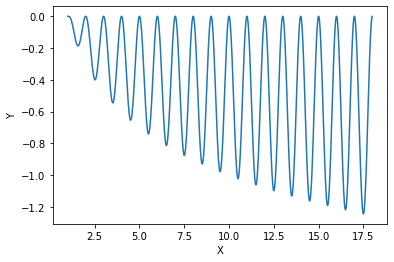

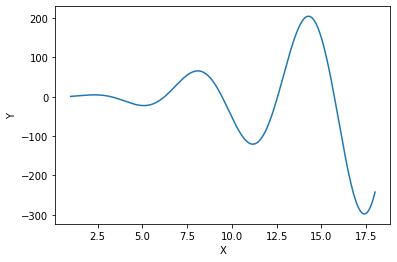

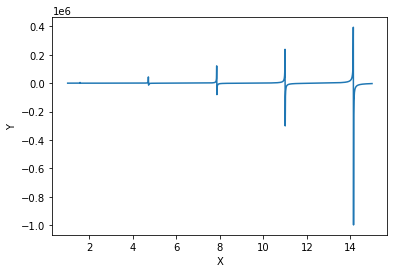

In [ ]:
plot_function(fmod, 1, 18)
plot_function(fmod2, 1, 18)
plot_function(fmod3, 1, 15)

In [ ]:
print('Метод дихотомии: ' + str(method1(fmod, 1, 18, 0.005, 0.005 / 2)))

RecursionError: ignored

In [ ]:
print('Метод золотого сечения: ' + str(method2(fmod, 1, 18, 0.0005)))
print('Метод Фиббоначи: ' + str(method3(fmod, 1, 18, 0.0005)))
print('Метод параболы: ' + str(method4(fmod, 1, 18, 0.0005)[0]))
print('Метод Брента: ' + str(method5(fmod, 1, 18, 0.0005)[0]))

Метод золотого сечения: 12.501510380396466
Метод Фиббоначи: (11.501742891161047, 23)
Метод параболы: 11.501909951304816
Метод Брента: 12.501490308124689


In [ ]:
print('Метод дихотомии: ' + str(method1(fmod2, 1, 18, 0.0005, 0.0005 / 2)))

RecursionError: ignored

In [ ]:
print('Метод золотого сечения: ' + str(method2(fmod2, 1, 18, 0.0005)))
print('Метод Фиббоначи: ' + str(method3(fmod2, 1, 18, 0.0005)))
print('Метод параболы: ' + str(method4(fmod2, 1, 18, 0.0005)))

Метод золотого сечения: 11.171936769284175
Метод Фиббоначи: (5.080453326359642, 23)


ValueError: ignored

In [ ]:
print('Метод Брента: ' + str(method5(fmod2, 1, 18, 0.0005)[0]))

Метод Брента: 11.171956841555952


In [ ]:
print('Метод дихотомии: ' + str(method1(fmod3, 1, 18, 0.0005, 0.0005 / 2)))

RecursionError: ignored

In [ ]:
print('Метод золотого сечения: ' + str(method2(fmod, 1, 18, 0.0005)))
print('Метод Фиббоначи: ' + str(method3(fmod, 1, 18, 0.0005)))
print('Метод параболы: ' + str(method4(fmod, 1, 18, 0.0005)[0]))
print('Метод Брента: ' + str(method5(fmod, 1, 18, 0.0005)[0]))

Метод золотого сечения: 12.501510380396466
Метод Фиббоначи: (11.501742891161047, 23)
Метод параболы: 11.501909951304816
Метод Брента: 12.501490308124689


# Зависимость количесва итераций от eps

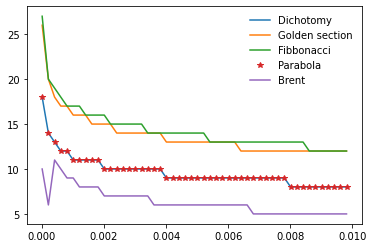

In [ ]:
eps_range = [eps for eps in np.arange(0.00001, 0.01, (1/5000))]
eps_range_log = [math.log(temp_e) for temp_e in eps_range]
list_of_iteratoins1 = []
list_of_iteratoins2 = []
list_of_iteratoins3 = []
list_of_iteratoins4 = []
list_of_iteratoins5 = []

for temp_e in eps_range:
  list_of_iteratoins1.append(method1iter(0.5, 2.5, temp_e))
  list_of_iteratoins2.append(method2iter(0.5, 2.5, temp_e))
  list_of_iteratoins3.append(method3(f5, 0.5, 2.5, temp_e, False, 0)[1])
  list_of_iteratoins4.append(method4(f5, 0.5, 2.5, temp_e, False)[1])
  list_of_iteratoins5.append(method5(f5, 0.5, 2.5, temp_e, False )[1])


plt.plot(eps_range, list_of_iteratoins1)
plt.plot(eps_range, list_of_iteratoins2)
plt.plot(eps_range, list_of_iteratoins3)
plt.plot(eps_range, list_of_iteratoins4, '*')
plt.plot(eps_range, list_of_iteratoins5)

l_1 = u'Dichotomy'
l_2 = u'Golden section'
l_3 = u'Fibbonacci'
l_4 = u'Parabola'
l_5 = u'Brent'

plt.legend((l_1, l_2, l_3, l_4, l_5), frameon=False)
